Problem 4
Choose two variables you have not investigated yet, and visualize their distributions, their relationship with
each other, and how these change over time.
Interpret your visualizations, noting any trends and/or outliers.

Ans) For this question i have decided to visualize the suicide rate for every continent over time. We can see that the number of suicide is highest in Asia. This may be because of the fact that Asia is the most populated continent. We also see that for every continent the population is almost increasing and with the increase suicides are also increasing but interestingly the rate of suicides in the American continent is increasing as opposed to other continents where it is decreasing. Although the suicide rate of the American continent is significantly low as compared to Asia and Europe.

In [1]:
import numpy as np
import pandas
import folium
import pandas as pd
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns


In [2]:
#read tables
data_point_path = "ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "ddf--gapminder--systema_globalis/ddf--entities--"

suicide_table = pd.read_csv(data_point_path + "suicide_total_deaths--by--geo--time.csv")
population_table = pd.read_csv(data_point_path + "population_total--by--geo--time.csv")
country_table = pd.read_csv(entity_path + "geo--country.csv")

In [3]:
suicide_table = suicide_table.rename(columns={"geo": "country"})
population_table = population_table.rename(columns={"geo": "country"})

In [4]:
raw = pd.merge(suicide_table, population_table,left_on=["country", "time"],\
               right_on=["country", "time"], how='left')


In [5]:
raw = pd.merge(raw, country_table, left_on=["country"],\
               right_on=["country"], how='left')
raw = raw[["country", "name", "world_4region", "time", "suicide_total_deaths", "population_total"]]
raw = raw.rename(columns={ "time": "Year", 
                           "name": "Name",
                           "world_4region": "Continent"})

raw.head()

,country,Name,Continent,Year,suicide_total_deaths,population_total
0,afg,Afghanistan,asia,1990,702.97,12249114.0
1,afg,Afghanistan,asia,1991,753.93,12993657.0
2,afg,Afghanistan,asia,1992,819.72,13981231.0
3,afg,Afghanistan,asia,1993,894.01,15095099.0
4,afg,Afghanistan,asia,1994,976.86,16172719.0


In [6]:
continent_df = raw[["Year", "Continent", "suicide_total_deaths", "population_total"]]\
    .groupby(["Year", "Continent"]).sum().reset_index()
continent_df.head()
continent_df["sucide_rate"] = 100 * (continent_df["suicide_total_deaths"] / continent_df["population_total"])

In [7]:
continent_df.head()

,Year,Continent,suicide_total_deaths,population_total,sucide_rate
0,1990,africa,37726.32,6.336389e+08,0.005954
1,1990,americas,67095.18,7.212947e+08,0.009302
2,1990,asia,511178.76,3.170751e+09,0.016122
3,1990,europe,149816.85,7.922094e+08,0.018911
4,1991,africa,38911.60,6.508106e+08,0.005979


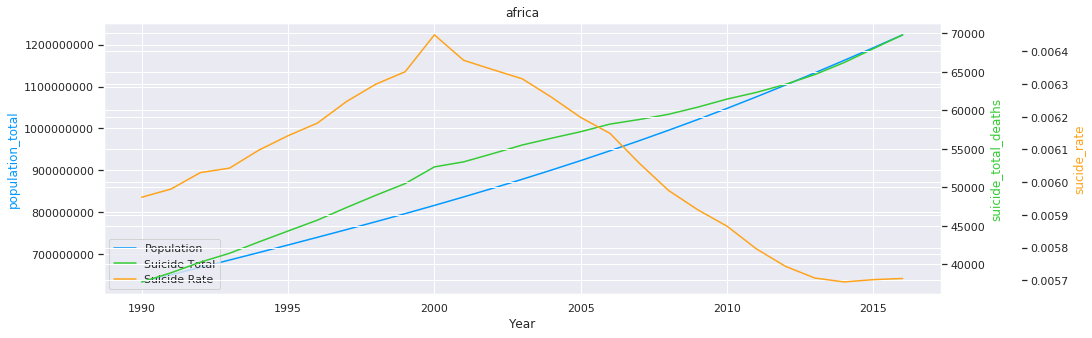

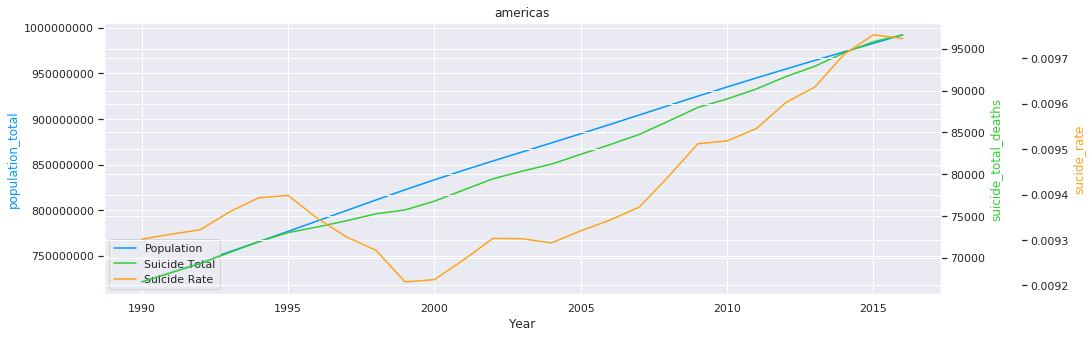

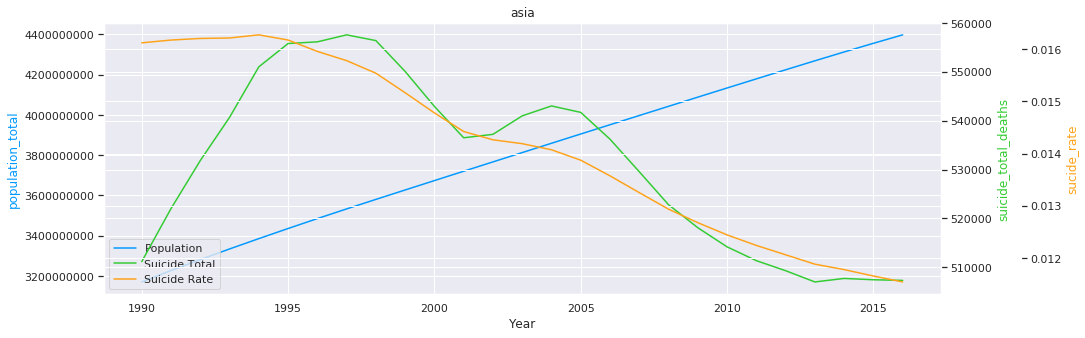

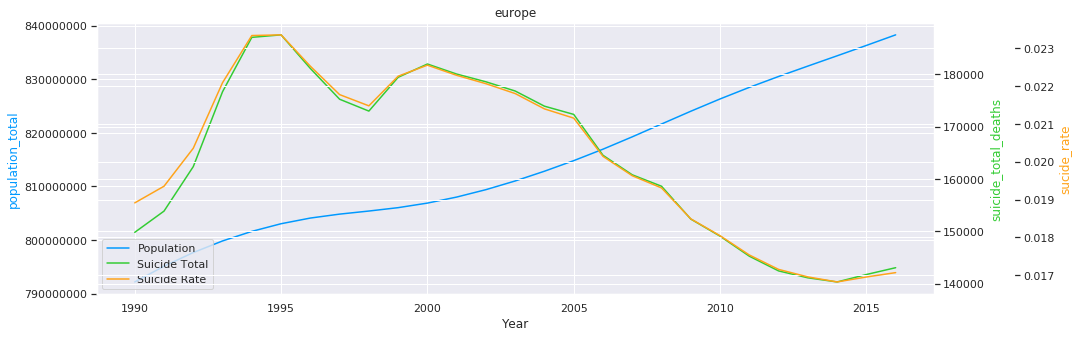

In [8]:
# [reference Link] : https://matplotlib.org/3.1.1/gallery/ticks_and_spines/multiple_yaxis_with_spines.html

for Continent in list(continent_df["Continent"].unique()):
    cdf = continent_df[continent_df["Continent"] == Continent]

    sns.set(rc={'figure.figsize':(15,5)})

    fig = plt.figure()
    host = fig.add_subplot(111)
    host.set_title(Continent)
    host.get_yaxis().get_major_formatter().set_scientific(False)

    par1 = host.twinx()
    par2 = host.twinx()
    
    host.set_xlabel("Year")
    host.set_ylabel("population_total")
    par1.set_ylabel("suicide_total_deaths")
    par2.set_ylabel("sucide_rate")
    
    p1, = host.plot(cdf["Year"], cdf["population_total"], color="#0099ff",label="Population")
    p2, = par1.plot(cdf["Year"], cdf["suicide_total_deaths"], color="#33cc33", label="Suicide Total")
    p3, = par2.plot(cdf["Year"], cdf["sucide_rate"], color="#ffa31a", label="Suicide Rate")

    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='lower left')
    par2.spines['right'].set_position(('outward', 80))
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    plt.show()